# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----



In [270]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [271]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [272]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


### 1. Dimensionality or shape of data

In [273]:
df.shape

(90565, 11)

### 2. Mean Temperature Year 2017

In [274]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%S')
# df.head(5)

In [275]:
df['year'] = df['datetime'].dt.year
# df.head(5)

In [276]:
yearly_df = df.groupby(['year', 'datetime']).mean()
# yearly_df.head(5)

In [277]:
year_2017_df = yearly_df.loc[2017]
# year_2017_df.head(5)

In [278]:
year_2017_df['temperature'].mean()

27.93335635359116

### 3. Beta Coefficients

In [279]:
from sklearn.linear_model import LinearRegression

X = pd.read_csv("data/PH_Weather_v1.csv")
# X.head(5)

In [280]:
X = X.drop(X[X['clouds'] == '***'].index)
df = df.drop(df[df['clouds'] == '***'].index)
X['clouds'].replace({
        'CLR': 0,
        'SCT': 1,
        'BKN': 2,
        'OVC': 3,
        'POB': 4,
        'OBS': 5
    }, 
    inplace=True
)
# X.head(5)

In [281]:
X['datetime'] = pd.to_datetime(X['datetime'], format='%Y%m%d%H%S')
X['month'] = df['datetime'].dt.month
X['hour'] = df['datetime'].dt.hour
# X.head(5)

In [282]:
X = X.drop([
    'temperature',
    'gust_speed',
    'altitude',  
    'precipitation',
    'datetime'
    ], axis=1
)
# X.info()

In [283]:
linear_model = LinearRegression()
linear_model.fit(X, df['temperature'])
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[ 1.07677410e-03  7.11925554e-02 -4.57799834e-05  8.98690750e-02
  1.03877617e-01 -1.08861676e+01  9.13332143e-02 -5.26992876e-02]


In [284]:
beta_coeff_df = pd.DataFrame(
    list(zip(X.columns, linear_model.coef_)), 
    columns='variable beta_coefficient'.split()
)
beta_coeff_df

,variable,beta_coefficient
0,wind_direction,0.001077
1,wind_speed,0.071193
2,sea_level_pressure,-0.000046
3,clouds,0.089869
4,visibility,0.103878
5,humidity,-10.886168
6,month,0.091333
7,hour,-0.052699


### 4. Highest beta coefficient and temperature relationship

In [285]:
beta_coeff_df.iloc[beta_coeff_df['beta_coefficient'].abs().idxmax()]

variable             humidity
beta_coefficient   -10.886168
Name: 5, dtype: object

Text(0.5, 1.0, 'Relationship between Humidity and Temperature')

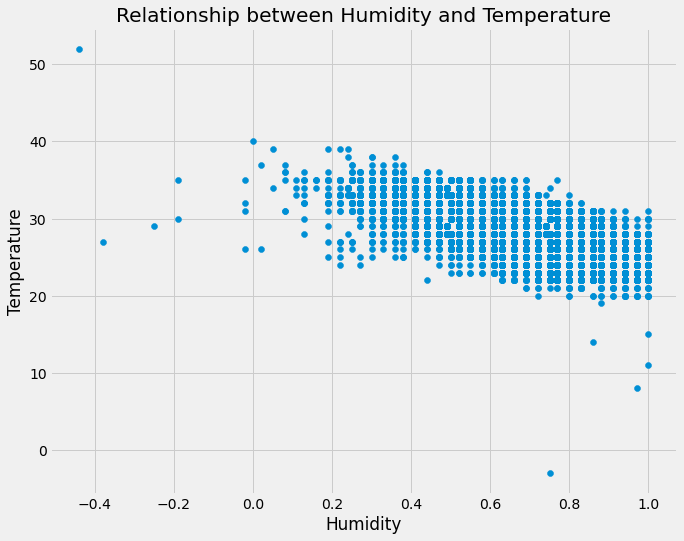

In [286]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(X["humidity"], df["temperature"])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Relationship between Humidity and Temperature")

### 5. Mean Squared Error

Text(0.5, 1.0, 'Temperature vs Predicted Temperature')

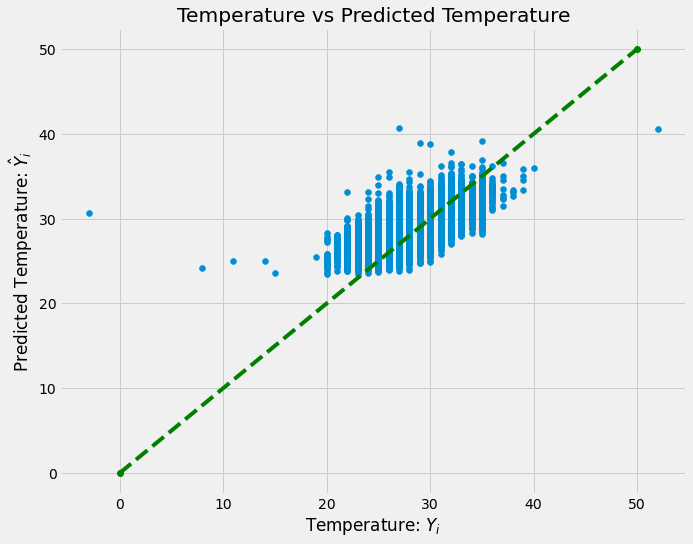

In [287]:
plt.figure(figsize=(10,8))


plt.scatter(df["temperature"], linear_model.predict(X))
plt.plot([0, 50], [0, 50], '--go')
plt.xlabel("Temperature: $Y_i$")
plt.ylabel("Predicted Temperature: $\hat{Y}_i$")
plt.title("Temperature vs Predicted Temperature")

In [288]:
mean_squared_error = np.mean((df["temperature"] - linear_model.predict(X))**2)
mean_squared_error

2.541065377549633

### 6. R^2 score

In [289]:
linear_model.score(X, df["temperature"])

0.5156921713874774

### 7. Is the model a good model?

No. Though, the model can be improve by adding more significant variables for predicting temperature, as the humidity variable is the only major predictor of temperature.